In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
from matplotlib import gridspec
from IPython.display import set_matplotlib_formats

# data on papers with fewer than 200 citations
data = pd.read_csv('./data/articles_features.csv')[['AvgAuthorRank', 
                                                  'AvgAffiliationRank', 
                                                  'JournalRank', 
                                                  'CitationCount']].query('CitationCount<=200')
data['HighlyCited'] = (data['CitationCount'] > 50).astype('int')

# Science of Science Summer School (S4) 2022
## Day 2: AI/ML
### A statistical perspective on learning
- Daniel E. Acuna, Department of Computer Science, University of Colorado, Boulder

# Outline of this unit
- Definition of learning
- Terminology
- Function learning
- Statistical learning
- Prediction: reduce vs irreducible error
- Inference
- Parametric models vs non-parametric models
- Supervised vs unsupervised learning
- Regression vs classification
- Interpretability vs flexibility

# What is learning?

# Learning
- From Merriam-Webster:
<div class="blockquote2">
    <ol> 
        <li>The act or experience of one that learns.</li>
        <li>Knowledge or skill acquired by instruction or study.</li>
        <li>Modification of a behavioral tendency by experience (such as exposure to conditioning.)</li>
    </ol>
</div>    

# Learning in this course
<br>
<center><img src="./images/unit-04/unit-04-0_aia2.png" width="25%" align="center"></center>  
<br>
Using experience to improve future performance:

  - Experience = Data
  - Future = Data not seen before
  - Performance = Error function or loss function


# What is statistical learning?

<div class="blockquote2">
    <p>Statistical learning refers to a vast set of tools for understanding data. These tools can be classified as supervised or unsupervised. Broadly speaking, supervised statistical learning involves building a statistical model for predicting, or estimating, an output based on one or more inputs. With unsupervised statistical learning, there are inputs but no supervising output; nevertheless we can learn relationships and structure from such data.</p>
</div>

# Terminology
- What we measure: **features** (*input variables, predictors, or independent variables*.)  

- What we want to predict or associate with what we measure: **output** (*label, response, dependent variable*.)  

- In the case of unsupervised learning, we do not have outputs.  

- We will focus on supervised learning first.

##### Terminology (2)
- What we measure: **features**  

- What we want to predict or associate with what we measure: **output**  

- Identify the features and outputs in the following examples:
  - Predict the citations of a paper in two years based on author, journal, and affiliation rankings.
  - Predict whether a paper will break 50 citations or more based on author, journal, and affiliation rankings
  - Predict the key phrases associated with a publication based on its abstract

# Mathematical formalization of learning
- We will say that **we want to learn a function $f$ about a phenomenon**.  
<br>
<br>
<center><img src="./images/unit-04/unit-04-0_aia4_3.png" width="90%" align="center"></center>

# Mathematical formalization of learning (2)
- Predict the citations of a paper in two years based on author, journal, and affiliation rankings.
<br>
<div class="container2">
  <div class="row2">
    <div class="col-6">
        <ul>
  <li>$x$: ?</li>
  <li>$y$: ?</li>
  <li>$X$: ?</li>
  <li>$Y$: ?</li>            
</ul>
      </div>
    <div class="col-6">
        <ul>
    <center><img src="./images/unit-04/unit-04-0_aia5_3.png" width="800" align="center"></center>
</ul>

    </div>
  </div>
</div>

# Mathematical formalization of learning (3)
- Predict whether a paper will break 50 citations in two years based on author, journal, and affiliation rankings
<br>
<div class="container2">
  <div class="row2">
    <div class="col-6">
        <ul>
  <li>$x$: Author, journal, and affiliation ranking</li>
  <li>$y$: Whether the paper will be cited more than 50 times in two years.  will have a second heart attack.</li>
  <li>$X$: Space of author, journal, and affiliation ranking.</li>
  <li>$Y$: True or False.</li>            
</ul>
      </div>
    <div class="col-6">
        <ul>
    <center><img src="./images/unit-04/unit-04-0_aia8_2.png" width="800" align="center"></center>
</ul>

    </div>
  </div>
</div>

# Example: Citation prediction
- Data on citation of an article after 2 years in the future based on:
 - Average ranking of authors
 - Average ranking of affiliation
 - Ranking of journal

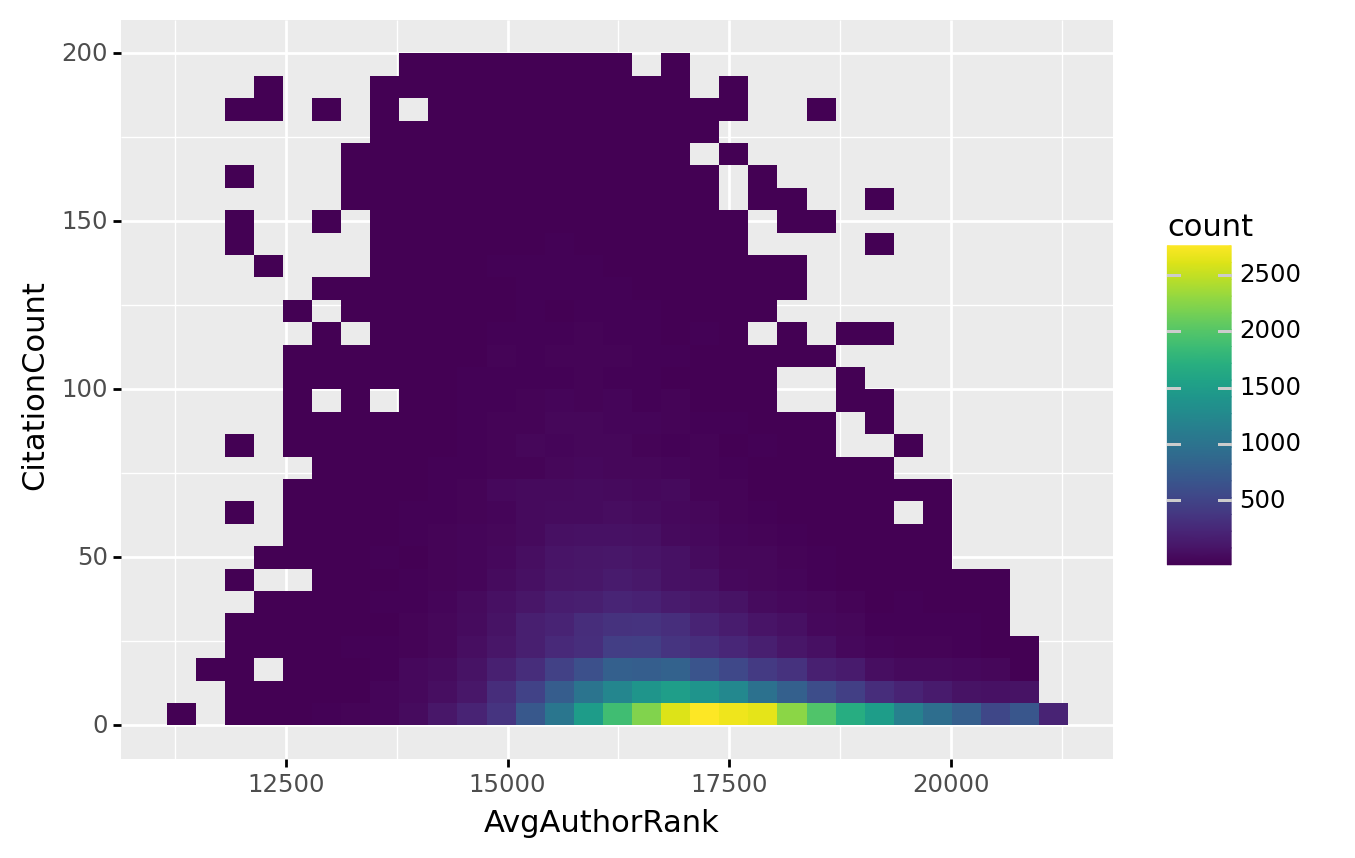

In [2]:
(ggplot(aes(x='AvgAuthorRank', y='CitationCount'), data=data) + stat_bin2d()).draw();

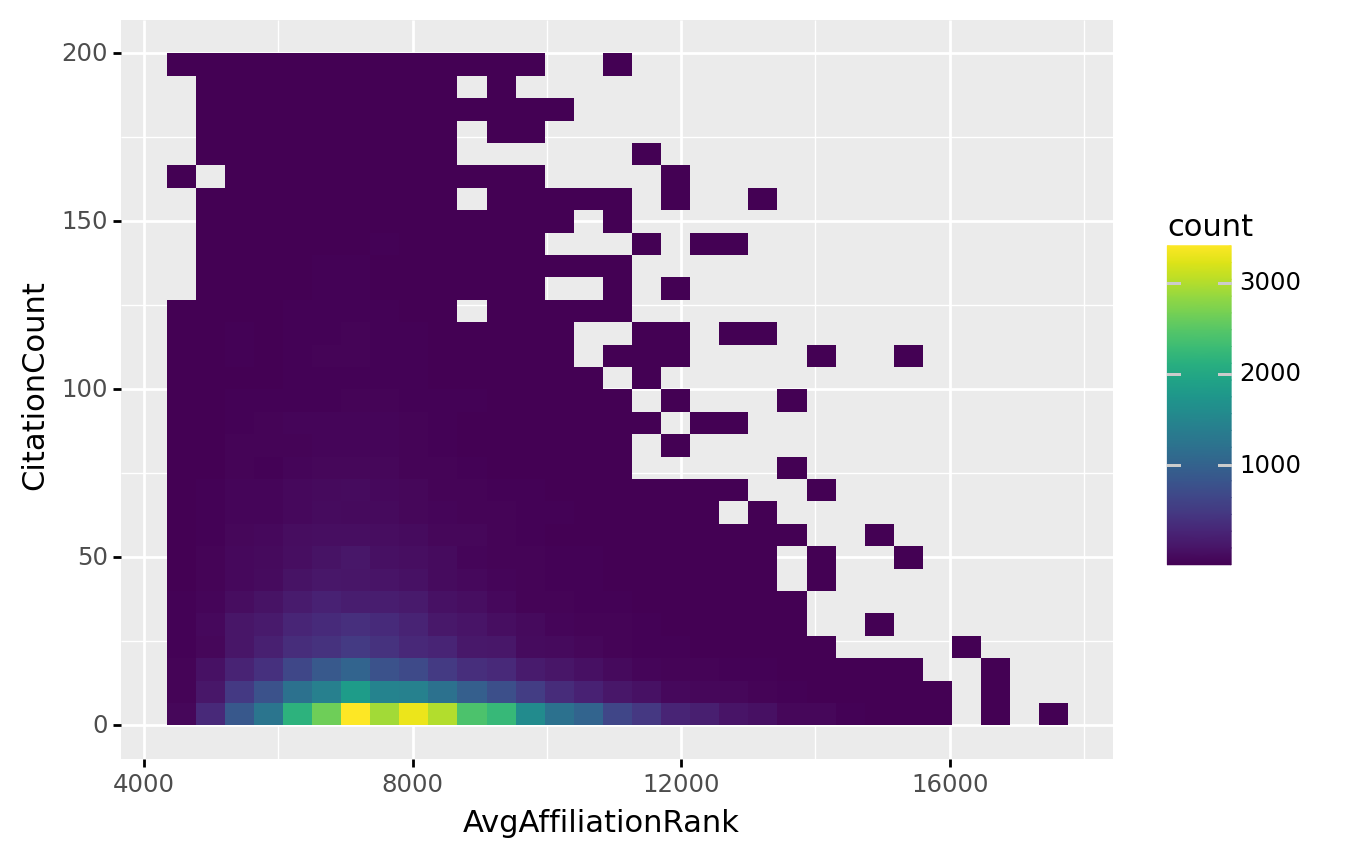

In [3]:
(ggplot(aes(x='AvgAffiliationRank', y='CitationCount'), data=data) + stat_bin2d()).draw();

# A statistical perspective on learning
- We wish to learn something from the data $D$.
- Statistical learning means that the data have been generated by some unknown *random process*:
$$x,y \thicksim p()$$  
- This reads *"$x,y$ are sampled according to the probability distribution $p(\cdot)$."*  
- **We wish to estimate the *unknown $p$* from such data**.

# A statistical perspective on learning
- Statistical learning refers to a set of approaches for estimating $\;f$ assuming some noise added into the system, which cannot be predicted from $x$.  
<br>
<br>
<center><img src="./images/unit-04/unit-04-0_aia12_2.png" width="90%" align="center"></center>

# Why we estimate $f$ ?
- Broadly speaking, we want to estimate $f$ to make **predictions** or **inference**, or both.
- **Prediction** for a new data point never seen before: $\;Y = f(X)$
- E.g., for the citations case, we might want to predict citations progression based on the authors ranking.
<br>
<br>
<center><img src="./images/unit-04/unit-04-0_aia13_2.png" width="90%" align="center"></center>

# Why we estimate $f$ ? (2)
<br>
<div class="container2">
  <div class="row2">
    <div class="col-6">
        <ul>
            <li>Assuming that there is a function such that $$y = f(x) + \epsilon$$</li>
            <li>We wish to minimize some loss function using our estimation $$\hat{Y} = \hat{f}(X)$$</li>
            <li>How small can we get our loss function?</li>
        </ul>
    </div>
</div>
    

# Why we estimate $f$ ? (3)
- There is always **reducible error** and **irreducible error**.  

- Squared error:   
\begin{align}
E[(Y-\hat{Y})^2] &= E[(f(X)+\epsilon-\hat{f}(X))^2] \\
&= E[(f(X)-\hat{f}(X))^2+2(f(X)-\hat{f}(X))\epsilon + \epsilon^2] \\
&= E[(f(X)-\hat{f}(X))^2]+\overbrace{E[2(f(X)-\hat{f}(X))\epsilon]}^0 + E[\epsilon^2] \\
&= E[(f(X)-\hat{f}(X))^2] + E[\epsilon^2] \\
\end{align}

- $E[(f(X)-\hat{f}(X))^2]$ is **reducible** variance.
- $E[\epsilon^2]$  is **irreducible** variance.




# Why we estimate $f$?

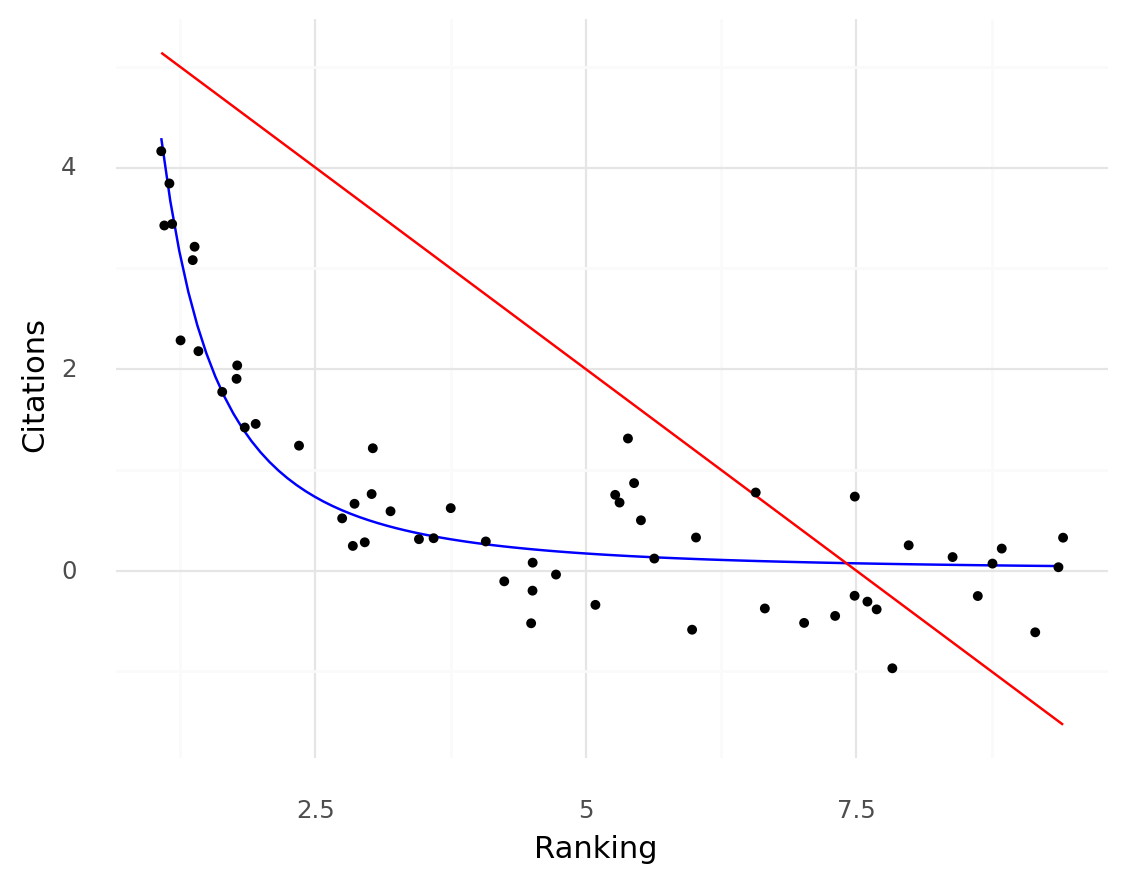

In [4]:
from plotnine import *

def f(x):
    return 5*x**-2.1

def e(x):
    return np.random.randn(x.shape[0])/2

n = 500
x = np.random.random(size=n)*9+0.8
c1 = np.random.choice(range(0, 3), size=n)
c2 = np.random.choice(range(0, 3), size=n)
y = f(x) + e(x)

toy_dataset = pd.DataFrame({'x': x, 'y': y, 'c1': c1, 'c2': c2})
(ggplot(aes(x='x', y='y'), data=toy_dataset.query('c1==0 and c2==0')) 
 + stat_function(fun=f, color='blue')
 + stat_function(fun=lambda x: 6 - 0.8*x, color='red')
 + geom_point(size=1) 
 + theme_minimal()
 + xlab('Ranking')
 + ylab('Citations')
).draw();

# Why we estimate $f$ ? (4)
- **Inference**: sometimes we want to understand $f$ (look inside)  

  - Which predictors are associated with $Y$? e.g., do we need to journal ranking for predicting citation?  
  - Relationship between $Y$ and each $X$. e.g., citations are higher for better affiliations?  
  
  - Is the relationship between $Y$ and $X$ appropriately captured by the model? Is the linear relationship enough?

# How do we estimate $f$ ?
- We estimate using **training data**. For notation, we will assume that we have $n$ training points. $x_{ij}$ is the value of variable $j$ for data point $i$, and $y_i$ is the independent variable for that data point.  

- **Parametric methods**
  1. Define the form of $f$ (e.g., linear model.)
  2. Use a procedure to fit or train the model.  
  
- **Nonparametric methods**
  - These methods don’t make assumptions about $f$.
  - Informally, they try to get as close as possible to the training data but not too close.
  - In general, the more data, the better the fit, but the harder to intepret.

# How do we estimate $f$ ? (2)
- Sometimes, the probability distribution that generated the data is known or assumed to be known, except for a set of parameters describing it.  

$$x,y \thicksim p(\theta)$$  

- We need to infer $\theta$

# Two views on statistical learning
- **Bayesian statistics**: use prior knowledge about the phenomenon and then combine evidence with that prior knowledge.

Mathematically, use prior over unknown parameters ($p(\theta)$) and the likelihood of the data given a parameter value ($p(x,y \mid \theta)$). Use Baye's Theorem to infer the data generating distribution.

$$\hat{\theta} \thicksim p(\theta \mid x,y)= \frac{p(x,y \mid \theta)p(\theta)}{p(x,y)}$$

# Two views on statistical learning (2)
- **Frequentist statistics**:  
  - Defines an *estimator* for a parameter based on data.  
  
  - It assumes a procedure where samples from the same data will be observed an infinite amount of time.  
  
  - It uses the resampled estimated to build a distribution over estimations.

- In this class, we will take a **frequentist view**:  
  
  - We will use the Maximum Likelihood Estimation (MLE):  

$$ \hat{\theta} = \arg\max_\theta p(y \mid \theta)$$

# Example: Citation dataset
- Let’s look at the citation distribution

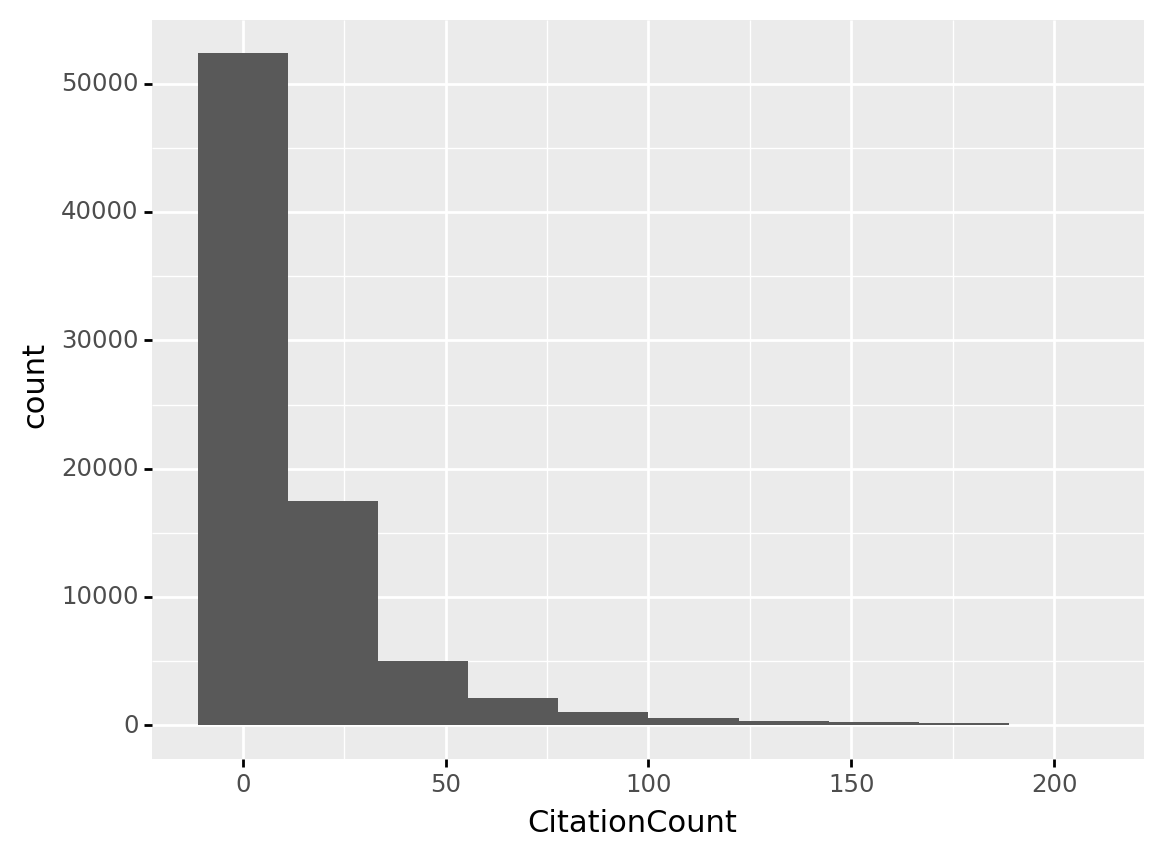

In [5]:
(ggplot(aes(x='CitationCount'), data=data) + geom_histogram(bins=10)).draw();

# Example: Citation dataset (2)
- We will assume that disease progression is distribuited according to a Gaussian distribution:

$$\text{citation} \thicksim p(\mu,\sigma)$$  

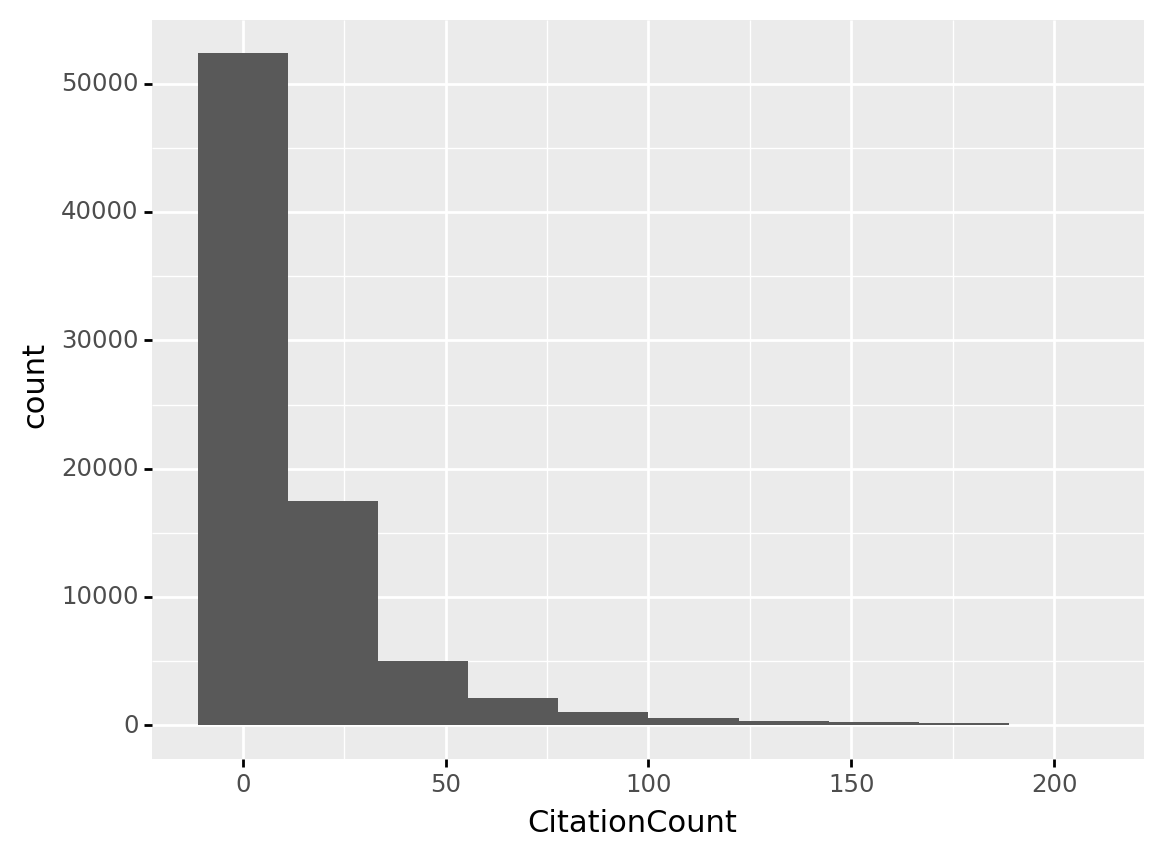

In [6]:
(ggplot(aes(x='CitationCount'), data=data) + geom_histogram(bins=10)).draw();

# Gaussian distribution
- Gaussian or Normal distribution: most common probability distribution.  

$$y \thicksim N(\mu, \sigma)=\frac{1}{\sigma\sqrt{2\pi}}\exp\left[-\frac{1}{2\sigma^2}(x-\mu)^2\right]$$

<br>

<center><img src="./images/unit-04/unit-04-0_aia17.png" width="50%" align="center"></center>

# Citations dataset and assumptions
- We will assume that each citation ($c$) is distributed according to a Gaussian distribution and each subject is independent of each other.

$$p(c_1,c_2,\ldots,c_{n} \mid \mu,\sigma)=p(c_1 \mid \mu,\sigma)p(c_2 \mid \mu,\sigma) \cdots p(c_{n} \mid \mu,\sigma)$$

# More interesting statistical learning
- Suppose there is a relationship:  
$$Y=f(X)+\epsilon$$  

  where $X$ is a set of independent variables and $Y$ is an output variable, and $\epsilon$ is some noise (e.g., unobserved phenomena, variability of subjects) with mean zero.
- Given that $\epsilon$ is a random variable, then the relationship is stochastic:  
$$p(Y \mid X)\thicksim N(f(X),\sigma_\epsilon)$$

# Parametric method: linear regression
- Linear regression assumes a linear relationship between $X$ and $Y$ plus some noise:  

$$Y = X\beta+\epsilon$$  

- The noise ($\epsilon$) is assumed to be Gaussian.  

- Therefore, we find the parameters ($\beta$) by minimizing the squared error (or equivalently, maximizing the likelihood.)

# Example: predicting citations based on avg. author ranking
- Predict disease progression based on the avg. author ranking.  

- **Prediction**:  
  Model: $\;Y = \beta_0 + \text{ar}\beta_1 + \epsilon$

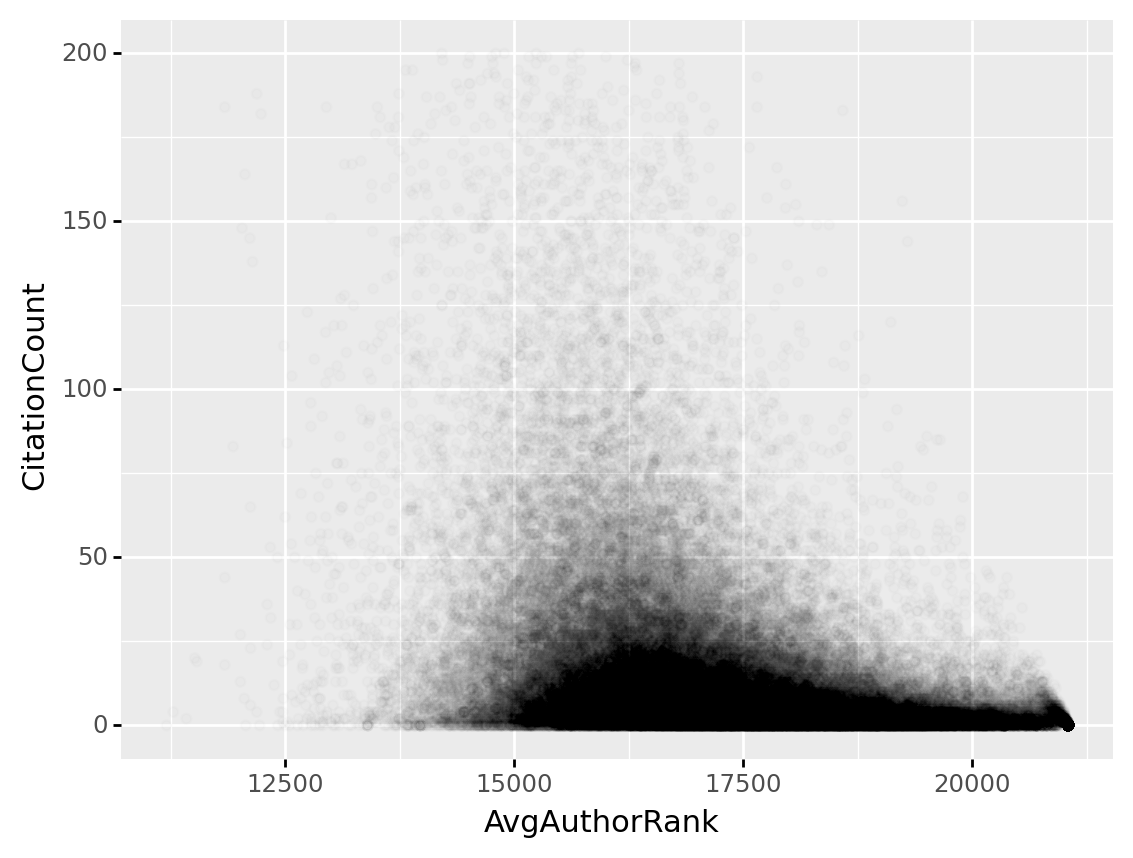

In [7]:
(ggplot(aes(x='AvgAuthorRank', y='CitationCount'), data=data) + geom_point(alpha=0.01)).draw();

# Example: predicting citations based on avg. author ranking (interpretation)
-   Model: $\;y = \beta_0 + \text{ar}\beta_1 + \epsilon$  

- This is, for each observation ($y_i,\text{ar}_i$), we will define:

  - $\mu_i = \beta_0 + \text{ar}\beta_1$  
  
  - $p(y_i \mid \text{ar}_i) = \prod_{i=1}^{n} {\frac{1}{\sigma\sqrt{2\pi}}\exp\left[-\frac{1}{2\sigma^2}(y_i-\mu_i)^2\right]}$ (\*)  


- Same as before, we want to find best $\beta_0$ and $\beta_1$ so as to maximize **(\*)** or minimize the squared error:
$$l(\beta_0,\beta_1) = \sum (y_i-\mu_i)^2$$


# Example: predicting progression based on author ranking (interpretation) (2)
- Again, we can take the derivatives and set them to zero:  

\begin{align}
\frac{dl(\beta_0,\beta_1)}{d\beta_0} &= \frac{d\sum(y_i-\mu_i)^2}{d\beta_0} \\
&= (y_1-\mu_1)^2 + \cdots + (y_n-\mu_n)^2 \\  
&= (y_1-(\beta_0+\beta_1\text{ar}_1))^2 + \cdots \\  
\end{align}

# Example: predicting progression based on author ranking (interpretation) (3)
- In general, we can express the loss function as: 
$$l(\beta) = (Y-X\beta)^T(Y-X\beta)$$  


- And we can try to find the minimum of that function by:
$$\frac{dl(\beta)}{d\beta} = 0$$  


- The solution to this is out of the scope of this class.

$$\hat{\beta} = (X^TX)^{-1}X^Ty$$ 



# Supervised learning: Linear regression
- Maximizing probability is equivalent to **minimizing squared errors of model**:  
$$ \text{citations} = b_0 + b_\text{ar} * \text{ar} + \epsilon$$
<br> 
<br>

<center><img src="./images/unit-04/unit-04-0_aia21.png" width="70%" align="center"></center>

# Supervised learning: Linear regression (3)
- Maximizing probability is equivalent to **minimizing squared errors of model**:  
$$ \text{citations} = b_0 + b_\text{ar} * \text{ar} + \epsilon$$
<br> 
<br>

<center><img src="./images/unit-04/unit-04-0_aia22.png" width="90%" align="center"></center>

# Supervised learning: Linear regression (4)
- Maximizing probability is equivalent to **minimizing squared errors of model**:  
$$ \text{citations} = b_0 + b_\text{ar} * \text{ar} + \epsilon$$
<br> 
<br>
<center><img src="./images/unit-04/unit-04-0_aia23.png" width="100%" align="center"></center>

# Supervised learning: Linear regression (5)
- Linear regression finds the parameters that maximize the probability of observing the data points.
$$ \text{citations} = 106 - 0.005 * \text{ar} + \epsilon$$

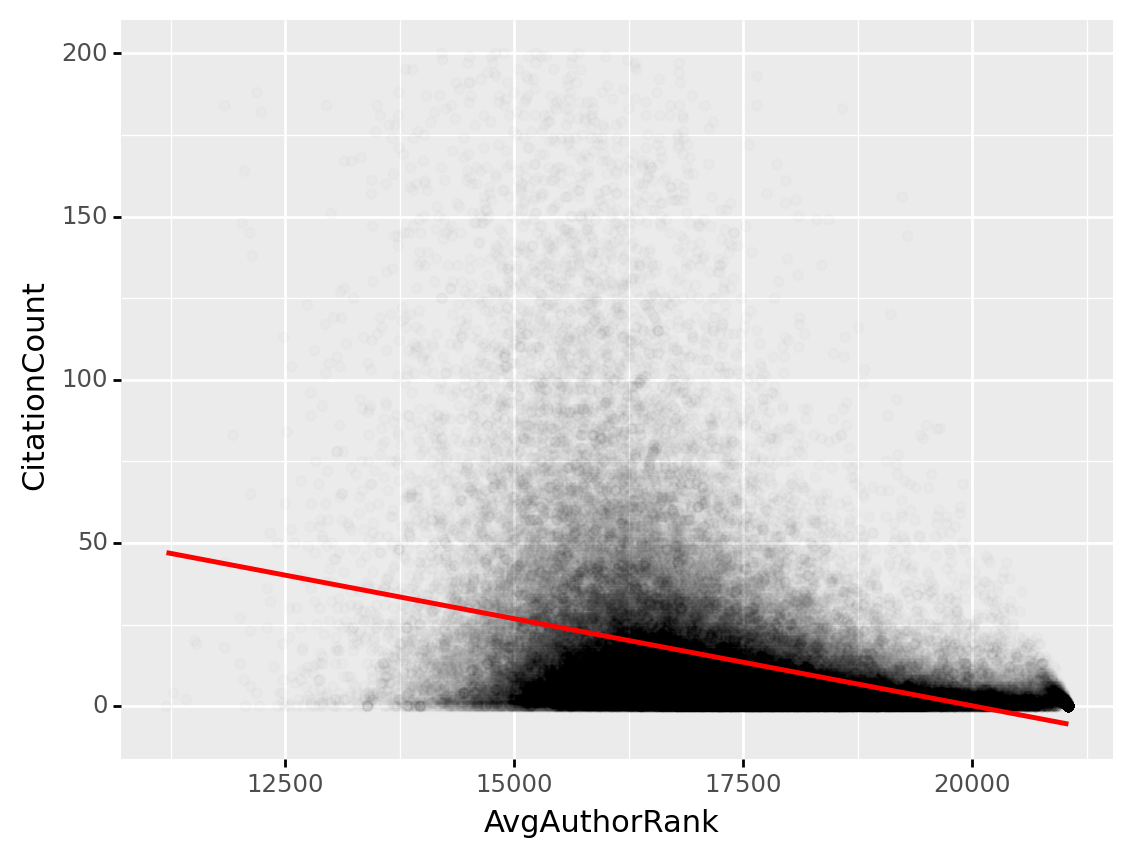

In [8]:
(ggplot(aes(x='AvgAuthorRank', y='CitationCount'), data=data) + geom_point(alpha=0.01) + geom_smooth(color='red')).draw();

# Nonparametric method: Nearest neighbors
<br>
<div class="container2">
  <div class="row2">
    <div class="col-6">
        <p>For a new data point $\hat{X}$ return the mean $Y$ of the closest $k$ points in the training data:</p>
        <ul>
            <li>Very simple to implement.</li>
            <li>Needs lots of data to work well.</li>
            <li>Hard to interpret.</li>
        </ul>
    </div>
</div>
    


# Regression vs classification
- When the variable we are trying to predict ($Y$) is quantitative, then we talk about **regression**.  

- When the variable is categorical (no easy comparison), then we talk about **classification**.  

- Examples of classification?

# Classification: statistical formulation
- In regression, we learn a *continuous probability distribution* such as Gaussian describing our outcome variable
- In classification, we learn a *discrete probability distribution* for our outcome variable
- This is because the variable $y$ takes on discrete values $C_1, C_2, \dots, C_k$

# Example: two-class logistic regression for classification

- One of the simplest models for classification
- It makes use of the Bernoulli probability distribution
$$ p(y \mid \theta) = \theta^y (1-\theta)^{y-1}$$
where $y \in \{0, 1 \}$ and represent two classes $C_1$ and $C_2$
- Can you give examples of two-class classification problems?

# Example: predicting whether a paper will break 50 citations

- Use the avg. author ranking for this prediction

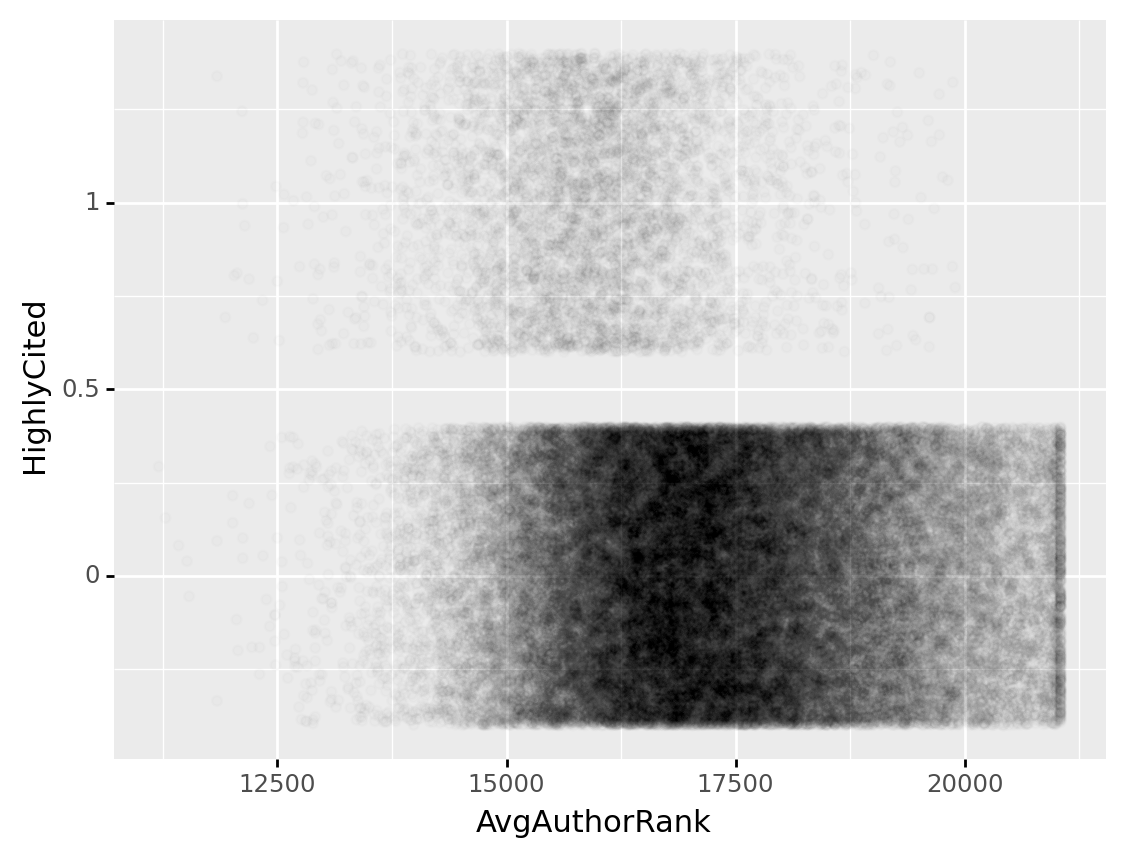

In [39]:
(ggplot(aes(x='AvgAuthorRank', y='HighlyCited'), data=data) + geom_jitter(alpha=0.01)).draw();

# Example: logistic regression
- More specifically, we map each set of features $x$ into a value between 0 and 1 using the following transformation:
- We first do a linear map of $x$ into $z$:

$$z = b_0 + b_1 x_1 + \dots + b_m x_m = x^T b$$

- And then, we perform a *non-linear transformation* of $z$

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$
which is called the **sigmoid** transform. The sigmoid is constrained between 0 and 1 (plot)
- We make $\sigma(z)$ equal to the probability of $y = 1$ or $\theta$ for a Bernoulli distribution.

# Example: logistic regression (2)
- Therefore, the likelihood of each observation is as follows

$$p(y_i \mid x_i, b) = \theta_i^{y_i} (1 - \theta_i)^{1 - y_i}$$

where

$$\theta_i = \sigma(x_i^T b)$$

- Therefore, the likelihood of a set of observations is as follows

$$p(y_1,\dots,y_n, \mid b, x_1, \dots, x_n ) = \prod_{i=1}^n p(y_i, \mid x_i, b)$$

# Accuracy vs. interpretability tradeoff
In general:
 - Simple models are less accurate but more interpretable.
 - Complex models are more accurate but less interpretable.  
<br>
<center><img src="./images/unit-04/unit-04-0_aia27.png" width="90%" align="center"></center>

# Supervised vs unsupervised learning
- **Supervised**:
  - Each $X$ is associated with a $Y$.  
  
- **Unsupervised**:
  - We have $X$ but no association.  


- Supervised learning is in general easier because we know how well we are building the association.  

- Unsupervised learning is harder because there is no clear evaluation method.  

- This course will mostly deal with **supervised learning**.

# Unsupervised learning
- There is no output.
- It can be seen as learning a function that maps the input into an intermediate representation.
- That intermediate representation makes the data easier to interpret.
- There should be a map back from such intermediate representation and the original space.
- The map from intermediate to feature space ($g$) should be as close as possible to the original input.
<center><img src="./images/unit-04/unit-04-0_aia28_3.png" width="70%" align="center"></center>

# Examples of unsupervised learning
- **Clustering**: cluster cited papers into groups.
- **Topic modeling**: describe the content of a set of documents (e.g., tweets) based on topics (soft clustering.)
- **Dimensionality reduction**: describe a large set of features into a smaller set of features while retaining the variability of the data.  
<br>
<center><img src="./images/unit-04/unit-04-0_aia28_3.png" width="90%" align="center"></center>

# Activity

1. Think of a supervised and unsupervised problems in science of science
1. Think of three problems in science of science that require 1) prediction but no inference, 2) inference but no prediction, 3) prediction and inference